ПИН-б-з-19-1 Лычкин А.В.

**Скачайте набор данных Cars и используйте функции и методы библиотеки Pandas для загрузки и начальной работы с данными**

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from google.colab import files

df = pd.read_csv('/content/cars.csv', delimiter = ',')

df.duplicated().sum()

DF = df.drop_duplicates().reset_index(drop=True)

DF.to_csv('/content/cars_no_dup.csv',index=False)

DF = pd.read_csv('/content/cars_no_dup.csv', delimiter = ',')

DF.sort_values(by = 'Year', ascending= False)

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro)
29164,Audi,A5,2021,Sedan,661.0,2000.0,Petrol,Automatic,32200.0
32583,Mercedes,GLS Klass,2021,SUV,0.0,3000.0,Diesel,Automatic,107528.0
15611,Volkswagen,Polo,2021,Universal,280000.0,1400.0,Petrol,Manual,1900.0
6044,Skoda,Superb,2021,Sedan,0.0,1500.0,Petrol,Automatic,30000.0
11840,Toyota,Corolla,2021,Universal,288.0,1987.0,Hybrid,Automatic,23000.0
...,...,...,...,...,...,...,...,...,...
22488,Audi,80,1900,Sedan,0.0,1000.0,Petrol,Manual,1500.0
37134,Mazda,323,1900,Sedan,145000.0,1800.0,Petrol,Manual,1450.0
27647,Vaz,2108,1900,Universal,57885658.0,889.0,Petrol,Manual,3500.0
36443,Toyota,Carina,1900,Sedan,2200.0,1800.0,Petrol,Manual,1600.0


**Выполните визуализацию данных с использованием библиотеки Pandas. Попробуйте построить разные виды графиков
для числовых признаков — скаттерограммы, гистограммы и
т. д. Для скаттерограмм попробуйте использовать категориальные данные для таких параметров графиков, как оттенок
(hue), размер маркера (size), тип маркера (style). Таким образом, вы можете объединить информацию о нескольких признаках в один двумерный график.**


Визуализация данных

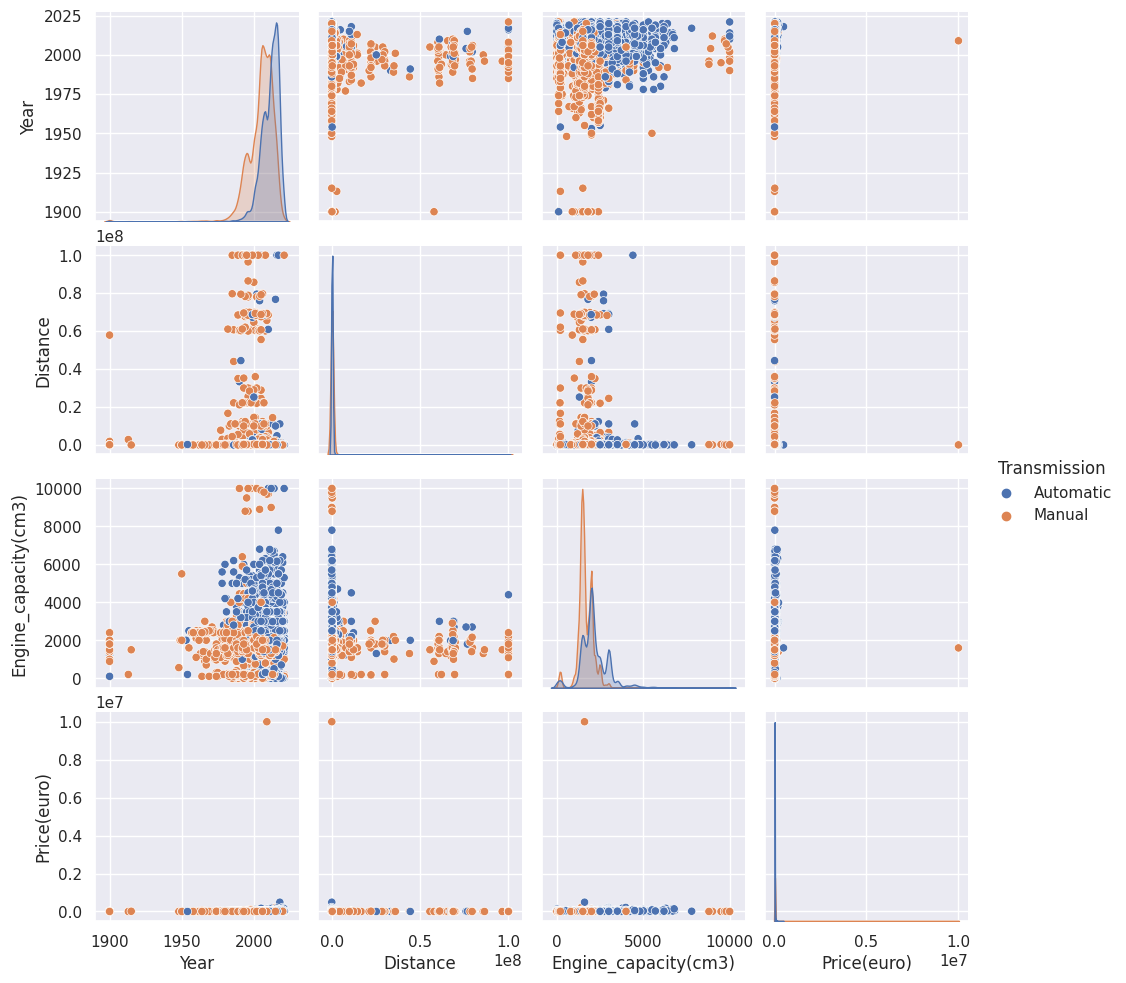

In [35]:
sns.pairplot(data = DF, hue ='Transmission')

**Выполните предварительную обработку данных. Сохраните результаты разных методов предварительной обработки в разные файлы, чтобы потом была возможность протестировать различные гипотезы.**

Предварительная обработка данных

In [61]:
cat_columns = []
num_columns = []

for column_name in df.columns:
    if (df[column_name].dtypes == object):
        cat_columns +=[column_name]
    else:
        num_columns +=[column_name]

Предварительная обработка числовых данных

In [62]:
DF[num_columns].describe()

,Year,Distance,Engine_capacity(cm3),Price(euro)
count,37264.000000,3.726400e+04,37264.000000,3.726400e+04
mean,2007.709264,4.758488e+05,1858.932535,9.569387e+03
std,8.295806,4.591520e+06,707.662731,5.283315e+04
min,1900.000000,0.000000e+00,0.000000,1.000000e+00
25%,2004.000000,9.000000e+04,1499.000000,3.300000e+03
50%,2009.000000,1.700000e+05,1800.000000,6.490000e+03
75%,2014.000000,2.300000e+05,2000.000000,1.179900e+04
max,2021.000000,1.000000e+08,9999.000000,1.000000e+07


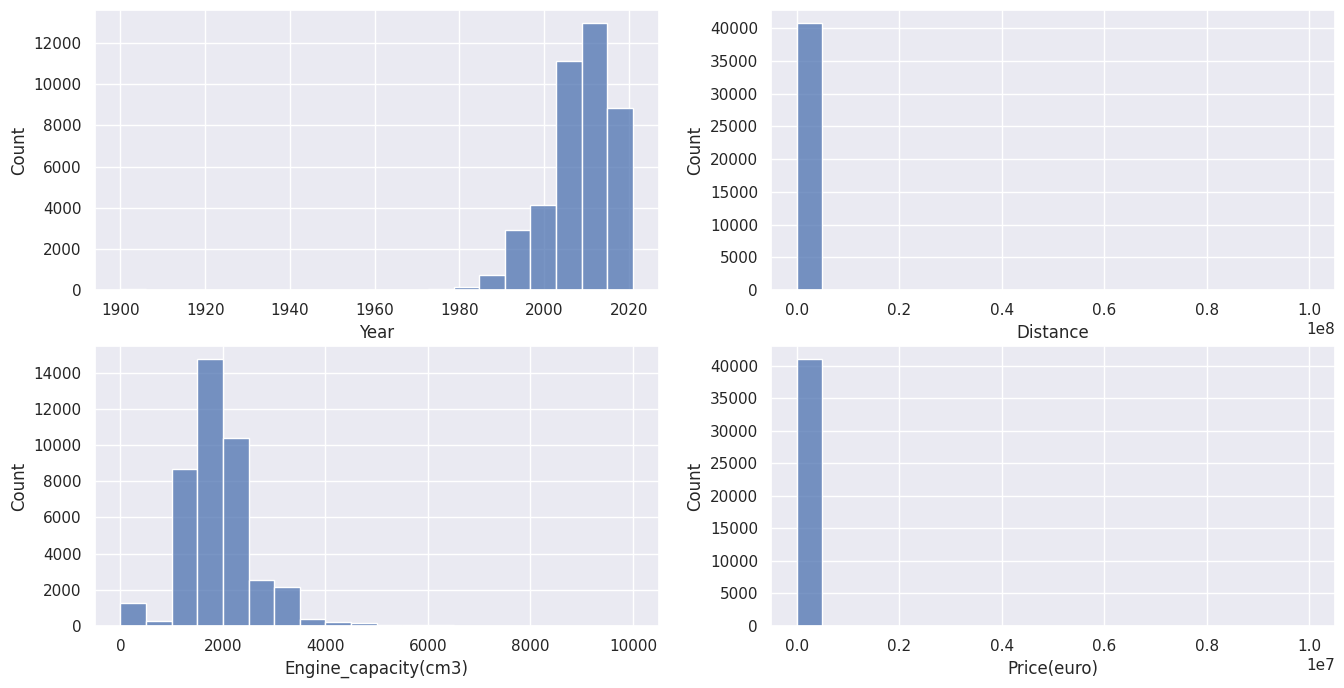

In [63]:
width = 2
height = int(np.ceil(len(num_columns)/width))
fig, ax = plt.subplots(nrows=height, ncols=width, figsize=(16,8))

for idx, column_name in enumerate(num_columns):

    plt.subplot(height,width, idx+1)
    sns.histplot(data=df,
            x=column_name, bins = 20);

In [64]:
# Удалим те объекты у которых Расстояние равно 0
question_dist = df[df.Distance == 0]
df = df.drop(question_dist.index)
# Старые автомобили с низким пробегом
question_dist_year = DF[(DF.Year <2021) & (DF.Distance < 1100)]
DF = DF.drop(question_dist_year.index)
# Аномально большой пробег
question_dist = DF[(DF.Distance > 0.5e6)]
DF = DF.drop(question_dist.index)
# Слишком малые значения объема двигателя
question_engine = DF [DF["Engine_capacity(cm3)"] < 200]
DF = DF.drop(question_engine.index)
# Слишком большие значения объема двигателя
question_engine = DF[DF["Engine_capacity(cm3)"] > 5000]
DF = DF.drop(question_engine.index)
# Аномально низкие цены
question_price = DF[(DF["Price(euro)"] < 101)]
DF = DF.drop(question_price.index)
# Слишком дорогие автомобили, которых мало
question_price = DF[DF["Price(euro)"] > 1e5]
DF = DF.drop(question_price.index)
# Слишком старые автомобили, которых мало
question_year = DF[DF.Year < 1971]
DF= DF.drop(question_year.index)

DF = DF.reset_index(drop=True)

Результат:

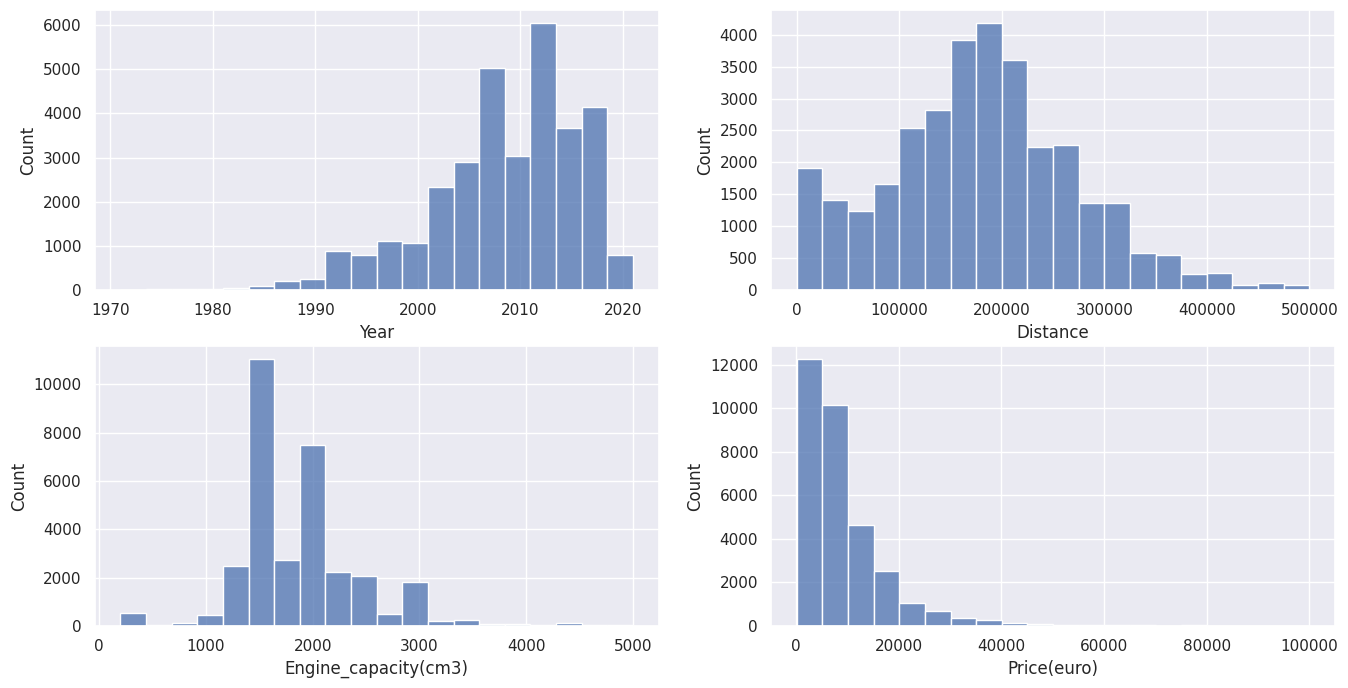

In [65]:
width = 2
height = int(np.ceil(len(num_columns)/width))
fig, ax = plt.subplots(nrows=height, ncols=width, figsize=(16,8))

for idx, column_name in enumerate(num_columns):

    plt.subplot(height,width, idx+1)
    sns.histplot(data=DF,
            x=column_name, bins = 20);

Стандартизация

<ipython-input-73-a7a32eb07bb9>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data = DF_scaled,


<Axes: xlabel='Distance', ylabel='Count'>

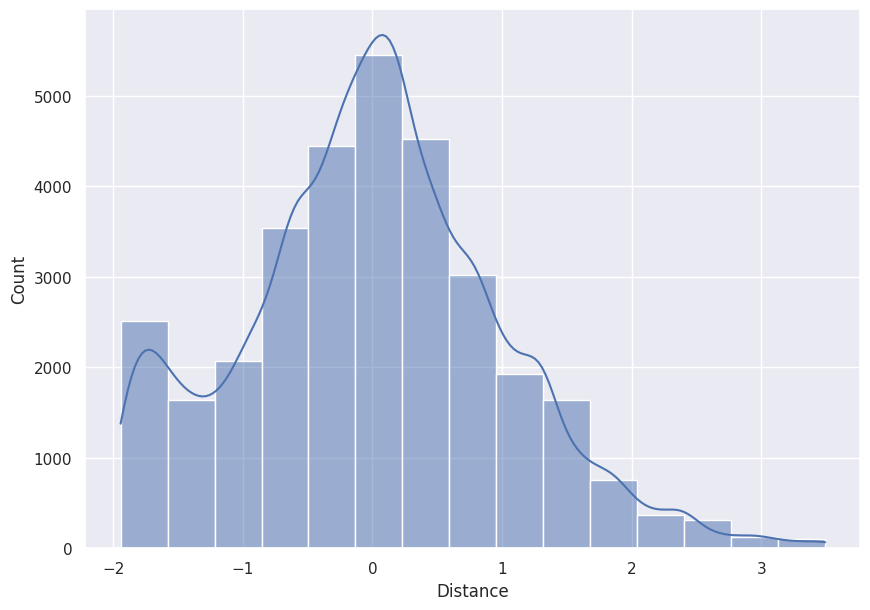

In [73]:
M = DF[num_columns].mean()
STD = DF[num_columns].std()
DF_scaled = (DF[num_columns]-M)/STD

fig = plt.figure(figsize=(10,7))
sns.histplot(data = DF_scaled,
             x = 'Distance',
             bins = 15, kde = True,
             palette='bwr')

Нормализация

<Axes: xlabel='Distance', ylabel='Count'>

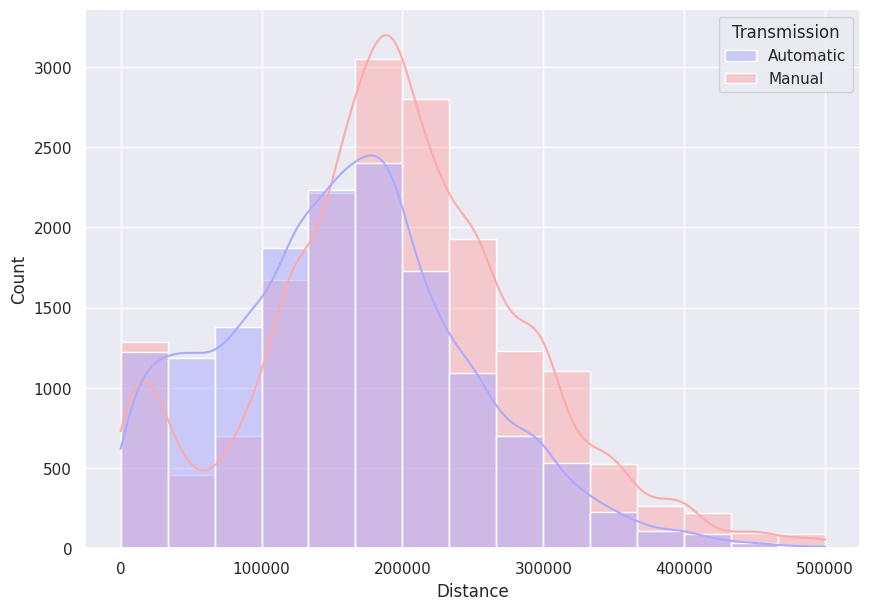

In [71]:
Xmin = DF[num_columns].min()
Xmax = DF[num_columns].max()

DF_norm = (DF[num_columns]- Xmin)/( Xmax - Xmin)

fig = plt.figure(figsize=(10,7))
sns.histplot(data = DF,
             x = 'Distance',
             hue = 'Transmission',
             bins = 15, kde = True,
             palette='bwr')

Предварительная обработка категориальных данных

In [74]:
DF[cat_columns].nunique()

counts = DF.Make.value_counts()

rare =  counts[(counts.values < 25)]
df['Make'] = df['Make'].replace(rare.index.values, 'Rare')

Приведение категориальных признаков к числовым

In [75]:
DF['Transmission'] = DF['Transmission'].map({'Automatic': 1,
'Manual': 0})

DF_ce = df.copy()
DF_ce[cat_columns] = DF_ce[cat_columns].astype('category')
for _, column_name in enumerate(cat_columns):
 DF_ce[column_name] = DF_ce[column_name].cat.codes

**Попытайтесь добавить в модель дополнительные признаки на основе имеющихся. Проверьте корреляцию новых признаков с добавленными**

In [80]:
DF['Age'] = 2022 - DF.Year

DF['km_year'] = DF.Distance/DF.Age

cm = sns.color_palette("vlag", as_cmap=True)
DF.corr().style.background_gradient(cmap=cm, vmin = -1, vmax=1)

<ipython-input-80-ca3e4c194f67>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  DF.corr().style.background_gradient(cmap=cm, vmin = -1, vmax=1)


,Year,Distance,Engine_capacity(cm3),Transmission,Price(euro),Age,km_year
Year,1.000000,-0.402526,-0.023528,0.388939,0.552263,-1.000000,0.428859
Distance,-0.402526,1.000000,0.076571,-0.182997,-0.345466,0.402526,0.455867
Engine_capacity(cm3),-0.023528,0.076571,1.000000,0.402786,0.381888,0.023528,-0.008767
Transmission,0.388939,-0.182997,0.402786,1.000000,0.488991,-0.388939,0.144490
Price(euro),0.552263,-0.345466,0.381888,0.488991,1.000000,-0.552263,0.153250
Age,-1.000000,0.402526,0.023528,-0.388939,-0.552263,1.000000,-0.428859
km_year,0.428859,0.455867,-0.008767,0.144490,0.153250,-0.428859,1.000000
